# 771768 - Introduction to Programming for Artificial Intelligence and Data Science (Assignment)
## Student ID: 202425274

## Data Processing 
Using standard python (No pandas / seaborn) with default libraries (os, sys, time, json, csv, 
…) you have been given the following tasks: 

## Task 1
Read in the provided ACW Data using the CSV library.

In [2]:
# Import CSV module to work with csv file
import csv

# Open the file in reading mode ("r") and "with" is safest option to work with a csv file
with open("acw_user_data.csv", mode="r") as file:
    # Read each row also and take it to csv_read as a string
    csv_read = csv.reader(file)

    # Iterate each row of csv_read
    for row in csv_read:
        # Print each row
        print(row)
    

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Dollar)', 'Retired', 'Yearly Salary (Dollar)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe']
['Studio 33K Joel walk', 'Randallborough', 'ME3N

## Task 2
As a CSV file is an entirely flat file structure, we need to convert our data back into its
rich structure. Convert all flat structures into nested structures. These are notably:

a. Vehicle - consists of make, model, year, and type

b. Credit Card - consists of start date, end date, number, security code, and
IBAN.

c. Address - consists of the main address, city, and postcode.

For this task, it may be worthwhile inspecting the CSV headers to see which data
columns may correspond to these above.

Note: Ensure that the values read in are appropriately cast to their respective types.

In [3]:
# Empty list to store the nested data structure for every row
nested_struc_data = []
with open("acw_user_data.csv", mode="r") as file:
    # Reading file as a dictionary, so every row turns into a dictionary with column headers
    csv_read = csv.DictReader(file) # Reference: https://python-adv-web-apps.readthedocs.io/en/latest/csv.html
    for row in csv_read:
        # Appending a nested structure to the list 
        nested_struc_data.append({
            # a. Nesting the vehicle details
            "Vehicle": {
                "Make": row["Vehicle Make"],
                "Model": row["Vehicle Model"],
                "Year": int(row["Vehicle Year"]),  # Cast 'Year' to integer
                "Type": row["Vehicle Type"]
            },
            # b. Nesting the credit card details
            "CreditCard": {
                "StartDate": row["Credit Card Start Date"],
                "EndDate": row["Credit Card Expiry Date"],
                "Number": row["Credit Card Number"],
                "SecurityCode": row["Credit Card CVV"],
                "IBAN": row["Bank IBAN"]
            },
            # c. Nesting the address details
            "Address": {
                "MainAddress": row["Address Street"],
                "City": row["Address City"],
                "Postcode": row["Address Postcode"]
            }
        })
# Printing the result of the nested structure to chcek its correction
print(nested_struc_data)            

[{'Vehicle': {'Make': 'Hyundai', 'Model': 'Bonneville', 'Year': 2009, 'Type': 'Pickup'}, 'CreditCard': {'StartDate': '08/18', 'EndDate': '11/27', 'Number': '676373692463', 'SecurityCode': '875', 'IBAN': 'GB62PQKB71416034141571'}, 'Address': {'MainAddress': '70 Lydia isle', 'City': 'Lake Conor', 'Postcode': 'S71 7XZ'}}, {'Vehicle': {'Make': 'Nissan', 'Model': 'ATS', 'Year': 1996, 'Type': 'Coupe'}, 'CreditCard': {'StartDate': '08/12', 'EndDate': '11/26', 'Number': '4529436854129855', 'SecurityCode': '583', 'IBAN': 'GB37UMCO54540228728019'}, 'Address': {'MainAddress': '00 Wheeler wells', 'City': 'Chapmanton', 'Postcode': 'L2 7BT'}}, {'Vehicle': {'Make': 'GMC', 'Model': 'Achieva', 'Year': 2015, 'Type': 'Convertible, Coupe'}, 'CreditCard': {'StartDate': '11/19', 'EndDate': '07/27', 'Number': '4091726363083888495', 'SecurityCode': '422', 'IBAN': 'GB40CVUE84011545859591'}, 'Address': {'MainAddress': 'Studio 33K Joel walk', 'City': 'Randallborough', 'Postcode': 'ME3N 1GH'}}, {'Vehicle': {'Make

## Task 3
The client informs you that they have had difficulty with errors in the dependants
column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion
from Task 2. These should be changed into something meaningful when encountered.

Print a list where all such error corrections take place.

E.g. Problematic rows for dependants: [16, 58, 80, 98]

In [4]:
problem_row = [] # Save problemic indices in problematic row

# Open CSV file with reading mode
with open("acw_user_data.csv", mode = "r") as file:
    csv_read = csv.DictReader(file)

    for index, row in enumerate(csv_read, start = 1):
        # check for problematic values and empty in the "Dependants" column
        if row["Dependants"].strip() == "":
            problem_row.append(index) # Record probleamtic and empty number 
            row["Dependants"] = 0 # Replace 0 with the problematic and empty value

# Check the problematic values and empty value
print("Problematic rows for the dependants column: ",problem_row) 

Problematic rows for the dependants column:  [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


## Task 4
Write all records to a processed.json file in the JSON data format shown in the
appendix to this document. This should be a list of dictionaries, where each index of
the list is a dictionary representing a singular person. 


In [5]:
# Call the json module to work with json file
import json

# Open the json file and putting into writing mode
with open("processed.json", mode="w") as json_file:
    # Add/Dump the nested structured into json file with indentation for proper readability
    json.dump(nested_struc_data, json_file, indent = 4)

# To just see Successful command
print('All data have been written in "processed.json" file')     


All data have been written in "processed.json" file


## Task 5
You should create two additional file outputs, retired.json and employed.json,
these should contain all retired customers (as indicated by the retired field in the
CSV), and all employed customers respectively (as indicated by the employer field in
the CSV) and be in the JSON data format.


In [6]:
# Two lists to hold the data for retired and employed customers
retired_customers = []
employed_customers = []
# Open file with mode reading 'r' mode
with open("acw_user_data.csv", mode="r") as file:
    csv_read = csv.DictReader(file)

    # Check the customers is retired 
    for row in csv_read:
        if row["Retired"].strip().lower() == "true": # Check the retired field is true (Case-insensitive)
            # Append customer info to the list
            retired_customers.append({
                "FirstName": row["First Name"],
                "LastName": row["Last Name"],
                "Age": int(row["Age (Years)"]), # Cast 'age' to integer
                "Dependants": int(row["Dependants"]) if row["Dependants"].strip() else 0, # Check the 'Dependants' column and clean it with removing the withspace
                "Retired": True,
                "Salary": float(row["Yearly Salary (Dollar)"]), # Cast 'Salary' to float
                "Pension": float(row["Yearly Pension (Dollar)"]), # Cast 'Pension' to float
                "Address": { # Create a nested dictionary for address details
                    "MainAddress": row["Address Street"],
                    "City": row["Address City"],
                    "Postcode": row["Address Postcode"]

                }, 
               "Vehicle": { # Create a nested dictionary for vehicle details
                    "Make": row["Vehicle Make"],
                    "Model": row["Vehicle Model"],
                    "Year": int(row["Vehicle Year"]),  # Cast 'Year' to integer
                    "Type": row["Vehicle Type"]
               },
            
               "CreditCard": { # Create a nested dictionary for credit card details
                    "StartDate": row["Credit Card Start Date"],
                    "EndDate": row["Credit Card Expiry Date"],
                    "Number": row["Credit Card Number"],
                    "SecurityCode": row["Credit Card CVV"],
                    "IBAN": row["Bank IBAN"]
               }
            })    
        if row["Employer Company"].strip().lower() != "N/A": # Check for the 'Employer Company' column and process 
            employed_customers.append({
                "FirstName": row["First Name"],
                "LastName": row["Last Name"],
                "Age": int(row["Age (Years)"]),
                "Dependants": int(row["Dependants"]) if row["Dependants"].strip() else 0,
                "Retired": True,
                "Salary": float(row["Yearly Salary (Dollar)"]),
                "Pension": float(row["Yearly Pension (Dollar)"]),
                "Address": { # Create a nested dictionary for address details
                    "MainAddress": row["Address Street"],
                    "City": row["Address City"],
                    "Postcode": row["Address Postcode"]

                }, 
               "Vehicle": { # Create a nested dictionary for vehicle details
                    "Make": row["Vehicle Make"],
                    "Model": row["Vehicle Model"],
                    "Year": int(row["Vehicle Year"]),  # Cast 'Year' to integer
                    "Type": row["Vehicle Type"]
               },
            
               "CreditCard": { # Create a nested dictionary for credit card details
                    "StartDate": row["Credit Card Start Date"],
                    "EndDate": row["Credit Card Expiry Date"],
                    "Number": row["Credit Card Number"],
                    "SecurityCode": row["Credit Card CVV"],
                    "IBAN": row["Bank IBAN"]
               }
            })    
# Write retired customers to retired.json                
with open("retired.json", mode="w") as json_file:
    json.dump(retired_customers, json_file, indent=4) # Dump it to the json file

print("Retired customers data have been written in 'retired.json' file")

# Write employed customers to employed.json
with open("employed.json", mode="w") as json_file:
    json.dump(employed_customers, json_file, indent=4)# Dump it to the json file

print("Employed customers data have been written in 'employed.json' file")

Retired customers data have been written in 'retired.json' file
Employed customers data have been written in 'employed.json' file


## Task 6
The client states that there may be some issues with credit card entries. Any
customers that have more than 10 years between their start and end date need
writing to a separate file, called remove_ccard.json, in the JSON data format. The
client will manually deal with these later based on your output. They request that you
write a function to help perform this, which accepts a single row from the CSV data,
and outputs whether the row should be flagged. This can then be used when
determining whether to write the current person to the remove_ccard file. Note the
dates are shown in the format used on credit cards which is “MM/YY”.


In [7]:
def flag_credit_card(row):
    """
    Take a one row from thie CSV file and check if the credit card
    start date and expiry dates differ by more than 10 years.
    Returns True if the row should be flagged, False otherwise.
    """
    try:
        # Take credit card start end dates 
        start_date = row["Credit Card Start Date"]
        expiry_date = row["Credit Card Expiry Date"]

        # Parse years from MM/YY formate
        start_year = int(start_date.split("/")[1]) + 2000  # Convert YY to a full year (e.g., '18' -> 2018)
        expiry_year = int(expiry_date.split("/")[1]) + 2000  # Convert YY to a full year

        # Calculate year difference
        year_difference = expiry_year - start_year

        # Flag if difference exceeds the 10 years
        return year_difference > 10

    except ValueError:
        # Return False if malfunctioned data or missing data find
        return False
        
# list to keep the flagged rows
flagged_customers = []
# Open and read CSV file
with open("acw_user_data.csv", mode="r") as file:
    csv_read = csv.DictReader(file)

    for row in csv_read:
        # Use the flag function to find whether the row should be flagged
        if flag_credit_card(row):
            flagged_customers.append({
                "FirstName": row["First Name"],
                "LastName": row["Last Name"],
                "CreditCard": {
                    "StartDate": row["Credit Card Start Date"],
                    "EndDate": row["Credit Card Expiry Date"],
                    "Number": row["Credit Card Number"]
                },
                "Address": {
                    "Street": row["Address Street"],
                    "City": row["Address City"],
                    "Postcode": row["Address Postcode"]
                },
                "PersonalDetails": {
                    "Age": int(row["Age (Years)"]),
                    "Retired": row["Retired"].strip().lower() == "true", # Check the retired field is true (Case-insensitive)
                    "Sex": row["Sex"]
                }
            })
# Write flagged cutomers to remove_ccard.json file
with open("remove_ccard.json", mode = "w") as json_file:
    json.dump(flagged_customers, json_file, indent=4)

print("Flagged credit card entries have been written into 'remove_ccard.json' file")    
            

Flagged credit card entries have been written into 'remove_ccard.json' file


## Task 7
You have been tasked with calculating some additional metrics which will be used for
ranking customers. You should create a new data attribute for our customers called
“Salary-Commute”. Reading in from processed.json:

a. Add, and calculate appropriately, this new attribute. It should represent the
Salary that a customer earns, per Km of their commute.
          
          i. Note: If a person travels 1 or fewer commute Km, then their salarycommute would be just their salary.
  
b. Sort these records by that new metric, in ascending order.

c. Store the output file out as a JSON format, for a commute.json file.


In [8]:
def calculate_salary_commute(data):
   
    """
    Calculate the Salary-Commute metric for each customer.
    If commute distance is 1 or less, then use salary as it is.
    """
    
    for customer in data:
        # Retrieve commute distance, if empty key found then return 0,and get the float
        commute_distance = float(customer.get("Distance Commuted to Work (Km)", 0)) # Reference: https://www.programiz.com/python-programming/methods/dictionary/get
        salary = float(customer.get("Yearly Salary (Dollar)", 0))  # Use .get() to avoid KeyError

        # If the commute distance is 1 or less Km, Salary-Commute equals salary
        if commute_distance <= 1:
            customer["Salary-Commute"] = salary
        else:
            # Otherwise calculate the Salary-Commute as Salary / Commute Distance
            customer["Salary-Commute"] = salary / commute_distance
    return data

def sort_salary_commute(data):
    """
    Sort data of Salary-commute metric in ascending order.
    """
    # Sort the list by the "Salary-Commute"
    return sorted(data, key=lambda x: x["Salary-Commute"]) # Reference: https://python.pages.doc.ic.ac.uk/lessons/core10/05-lambda/03-sorted.html


# Open json file with reading mode
with open("processed.json", mode="r") as file:
    customer_data = json.load(file)

# Calculate the Salary-Commute for each customer
updated_data = calculate_salary_commute(customer_data)

# Sort the data by Salary-Commute in ascending order
sorted_data = sort_salary_commute(updated_data)

# Save the sorted data into commute.json
with open("commute.json", mode="w") as file:
    json.dump(sorted_data, file, indent=4)

print("Data has been successfully written into 'commute.json' file.")


Data has been successfully written into 'commute.json' file.





# Data Visualisation 
#### Using Pandas and Seaborn  

Your client wishes to understand the data they have on their customers a bit more by use of 
visualisations. With use of Pandas and Seaborn read in the original CSV file provided with
 the assignment. 

## Task 1
Obtain the Data Series for Salary, and Age, and calculate the following:  
a. Mean Salary  
b. Median Age

In [9]:
# Import pandas to manipulation for CSV file
import pandas as pd

# Load CSV file's data
df = pd.read_csv("acw_user_data.csv")

# Extract the column and calculate mean salary
mean_salary = df["Yearly Salary (Dollar)"].mean()

# Extract the column and calculate median age
median_age = df["Age (Years)"].mean()

# Print the both result to check
print(f"Mean Salary: ${mean_salary}")
print(f"Median Age: {median_age}")

Mean Salary: $57814.078
Median Age: 54.302


## Task 2
Perform univariate plots of the following data attributes:  
a. Age, calculating how many bins would be required for a bin_width of 5.  
b. Dependents, fixing data errors with seaborn itself.  
c. Age (of default bins), conditioned on Marital Status 


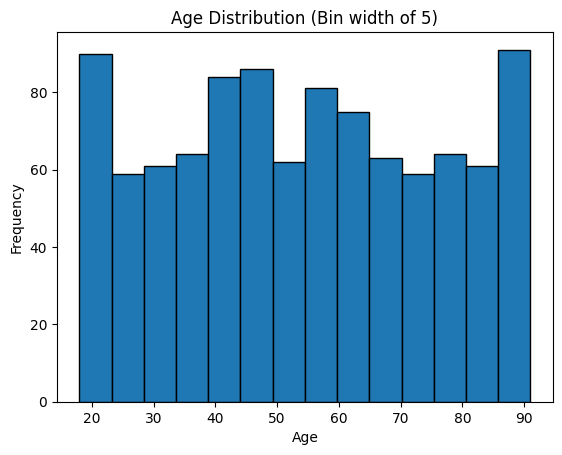

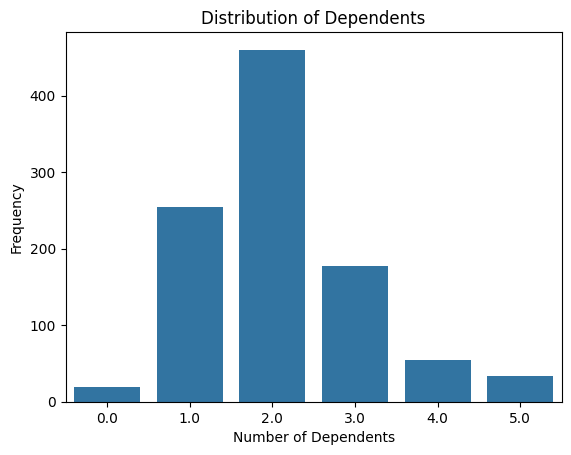

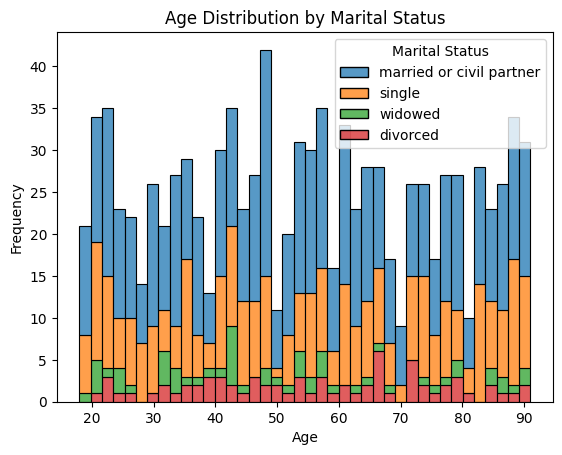

In [10]:
# Import two library for basic plot and for better looking plot
import matplotlib.pyplot as plt
import seaborn as sns

# a. Age, caclculating bin for bin width of 5
age_min = df["Age (Years)"].min() # Find minimum age in the column
age_max = df["Age (Years)"].max() # Find maximum age in the column
bin_width = 5 # Set width
number_of_bins = int((age_max - age_min)/ bin_width) # Calculate how many bins are needed base on range of ages and bin width 

plt.hist(df["Age (Years)"], bins=number_of_bins, edgecolor='black') # Create histogram to show the distribution of ages
plt.title("Age Distribution (Bin width of 5)") # Set a title
plt.xlabel("Age") # Label x-axis
plt.ylabel("Frequency") # Label y-axis
plt.show() # Show the plot


# b. Correct the column name and assign in new column
df["Dependents"] = pd.to_numeric(df["Dependants"], errors='coerce')  

# Replace missing values with 0 and return back into the dataframe
df["Dependents"] = df["Dependents"].fillna(0)

# Create a bar chart to show each number of dependents appears
sns.countplot(x=df["Dependents"])
plt.title("Distribution of Dependents") # Set a title
plt.xlabel("Number of Dependents") # Label x-axis
plt.ylabel("Frequency") # Label y-axis
plt.show() # Show the plot


# c. Plot age by Marital Status
sns.histplot(data=df, x="Age (Years)", hue="Marital Status", kde=False, bins=40, multiple="stack") # Create histogram for age column
plt.title("Age Distribution by Marital Status") # Set a title
plt.xlabel("Age") # Label x-axis
plt.ylabel("Frequency") # Label y-axis
plt.show()  # Show the plot


## Task 3
Perform multivariate plots with the following data attributes:  
a. Commuted distance against salary.  
b. Age against Salary  
c. Age against Salary conditioned by Dependants

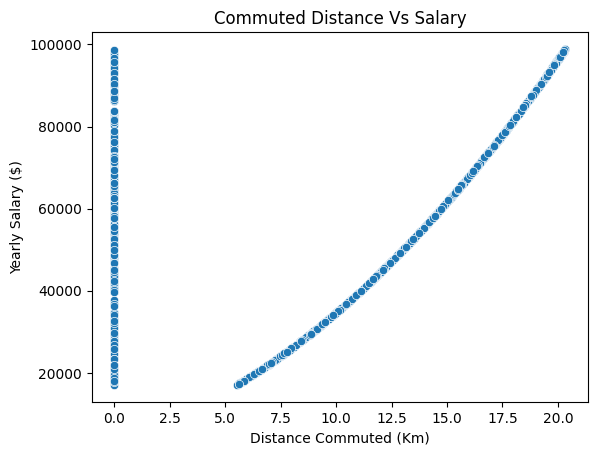

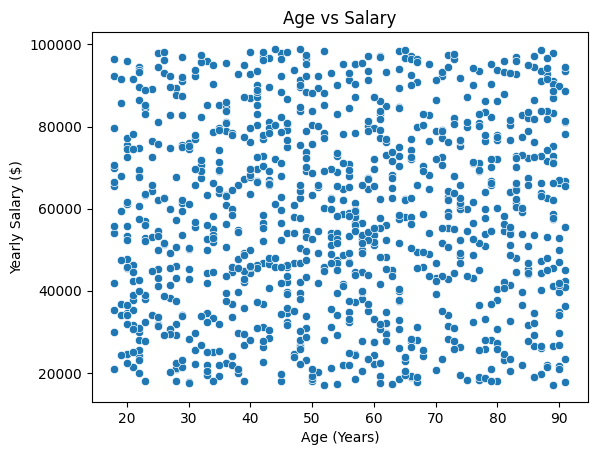

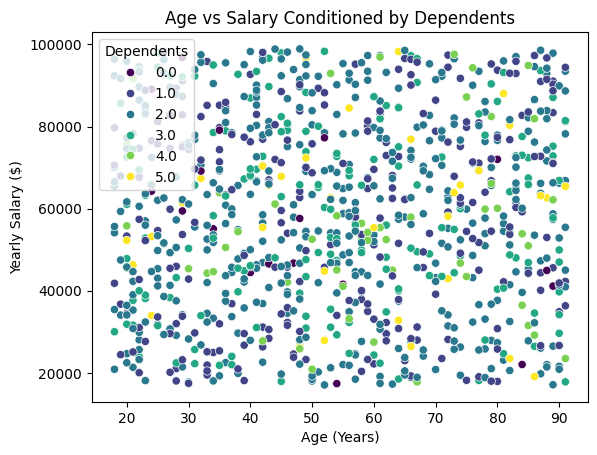

In [12]:
# Convert to numeric and replace missing/incorrect value with 0
df["Distance Commuted to Work (Km)"] = pd.to_numeric(df["Distance Commuted to Work (Km)"], errors='coerce').fillna(0)
df["Yearly Salary (Dollar)"] = pd.to_numeric(df["Yearly Salary (Dollar)"], errors='coerce').fillna(0)
df["Age (Years)"] = pd.to_numeric(df["Age (Years)"], errors='coerce').fillna(0)
df["Dependants"] = pd.to_numeric(df["Dependants"], errors='coerce').fillna(0) 

# a. Create plot for commuted distance against salary
sns.scatterplot(data=df, x="Distance Commuted to Work (Km)", y="Yearly Salary (Dollar)") # Create histogram for commuted distance against salary
plt.title("Commuted Distance Vs Salary") # Set a title
plt.xlabel("Distance Commuted (Km)") # Label x-axis
plt.ylabel("Yearly Salary ($)") # Label y-axis
plt.show() # Show the plot

# b. Create plot for age against salary
sns.scatterplot(data=df, x="Age (Years)", y="Yearly Salary (Dollar)") # Create histogram for age against salary
plt.title("Age vs Salary") # Set a title
plt.xlabel("Age (Years)") # Label x-axis
plt.ylabel("Yearly Salary ($)") # Label y-axis
plt.show() # Show the plot

# b. Create plot for age against salary hue conditioned by dependents
sns.scatterplot(data=df, x="Age (Years)", y="Yearly Salary (Dollar)", hue="Dependants", palette="viridis") # Create histogram for age against salary hue conditioned by dependents
plt.title("Age vs Salary Conditioned by Dependents") # Set a title
plt.xlabel("Age (Years)") # Label x-axis
plt.ylabel("Yearly Salary ($)") # Label y-axis
plt.legend(title="Dependents") # Create legend with title dependents
plt.show() # Show the plot




## Task 4
Your client would like the ability to save the plots which you have produced. Provide 
a Notebook cell which can do this. You should execute this cell and attach the 
generated plots with your submission.

In [14]:

# Function to save plots
def save_plot(plot_func, filename):
    plt.figure(figsize=(12, 8))  # Set figure size
    plot_func()  # Create the plot
    plt.savefig(filename, dpi=400, bbox_inches='tight')  # Save the plot as a file
    plt.close()  # Close the figure

# 2(a) Age distribution
def plot_age_distribution():
    plt.hist(df["Age (Years)"], bins=number_of_bins, edgecolor='black')

# 2(b) Dependents distribution
def plot_dependents_distribution():
    sns.countplot(x=df["Dependents"])

# 2(c) Age by marital status
def plot_age_by_marital_status():
    sns.histplot(data=df, x="Age (Years)", hue="Marital Status", kde=False, bins=40, multiple="stack")

# --- Save each plot ---

# 2(a) Age distribution
save_plot(plot_age_distribution, "age_distribution_bin_width_5.png")

# 2(b) Dependents distribution
save_plot(plot_dependents_distribution, "distribution_of_dependents.png")

# 2(c) Age by marital status
save_plot(plot_age_by_marital_status, "age_distribution_by_marital_status.png")

print("All plots have been saved successfully!")


All plots have been saved successfully!


In [15]:
# 3(a). Save Commuted Distance vs Salary plot
def plot_commuted_distance_vs_salary():
    sns.scatterplot(data=df, x="Distance Commuted to Work (Km)", y="Yearly Salary (Dollar)")

# 3(b). Save Age vs Salary plot
def plot_age_vs_salary():
    sns.scatterplot(data=df, x="Age (Years)", y="Yearly Salary (Dollar)")

# 3(c). Save Age vs Salary Conditioned by Dependents plot
def plot_age_vs_salary_by_dependents():
    sns.scatterplot(
        data=df,
        x="Age (Years)",
        y="Yearly Salary (Dollar)",
        hue="Dependants",
        palette="viridis"
    )

# --- Save each plot ---

# 3(a). Commuted Distance vs Salary
save_plot(plot_commuted_distance_vs_salary, "commuted_distance_vs_salary.png")

# 3(b). Age vs Salary
save_plot(plot_age_vs_salary, "age_vs_salary.png")

# 3(c). Age vs Salary by Dependents
save_plot(plot_age_vs_salary_by_dependents, "age_vs_salary_dependents.png")

print("All plots have been saved successfully!")

All plots have been saved successfully!
